# **install** **dependicies**

In [ ]:
!pip install ntscraper

In [ ]:
!pip install scikit-learn


# **Data** **Scraping** **from** **twitter**

In [ ]:
import pandas as pd
from ntscraper import Nitter
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from textblob import TextBlob
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [ ]:
scraper = Nitter()

Testing instances: 100%|██████████| 14/14 [00:04<00:00,  3.39it/s]


In [ ]:
tweets = scraper.get_tweets("stockmarket",mode="hashtag",number=200)
print(tweets)

INFO:root:No instance specified, using random instance https://nitter.privacydev.net
INFO:root:Current stats for stockmarket: 15 tweets, 0 threads...
INFO:root:Current stats for stockmarket: 33 tweets, 0 threads...
INFO:root:Current stats for stockmarket: 49 tweets, 0 threads...
INFO:root:Current stats for stockmarket: 63 tweets, 0 threads...


{'tweets': [{'link': 'https://twitter.com/dan_coyle/status/1862493901661090120#m', 'text': '🚀 Can Rigetti Computing [ $RGTI ] gain momentum or stall out? Dive into a detailed chart analysis and explore its potential for growth.  🎥 Watch now: https://youtu.be/cJyw5sGxkI0?si=8OKFnKp9fAEsn5MI #Stocks #Investing #Trading #RGTI #StockMarket #AI #QuantumComputing', 'user': {'name': 'Dan Coyle', 'username': '@dan_coyle', 'profile_id': '1604932054495404039', 'avatar': 'https://pbs.twimg.com/profile_images/1604932054495404039/8K4EmuA4_bigger.jpg'}, 'date': 'Nov 29, 2024 · 1:48 PM UTC', 'is-retweet': False, 'is-pinned': False, 'external-link': '', 'replying-to': [], 'quoted-post': {}, 'stats': {'comments': 0, 'retweets': 0, 'quotes': 0, 'likes': 0}, 'pictures': [], 'videos': [], 'gifs': []}, {'link': 'https://twitter.com/i2gain/status/1862439543888294069#m', 'text': '#Nifty 54 min chart - important levels and range.  #Nifty50 #Niftytoday #OptionsTrading #Sensex #StockMarket #Stocks #Relaince #HD

In [ ]:
type(tweets)

dict

In [ ]:
data = pd.DataFrame(tweets['tweets'])
data

,link,text,user,date,is-retweet,is-pinned,external-link,replying-to,quoted-post,stats,pictures,videos,gifs
0,https://twitter.com/dan_coyle/status/186249390...,🚀 Can Rigetti Computing [ $RGTI ] gain momentu...,"{'name': 'Dan Coyle', 'username': '@dan_coyle'...","Nov 29, 2024 · 1:48 PM UTC",False,False,,[],{},"{'comments': 0, 'retweets': 0, 'quotes': 0, 'l...",[],[],[]
1,https://twitter.com/i2gain/status/186243954388...,#Nifty 54 min chart - important levels and ran...,"{'name': 'Puneet, Low risk options’ combinatio...","Nov 29, 2024 · 10:12 AM UTC",True,False,,[],{},"{'comments': 0, 'retweets': 0, 'quotes': 0, 'l...",[https://pbs.twimg.com/media/Gdi2k5RWMAEYMdJ.jpg],[],[]
2,https://twitter.com/i2gain/status/186246584908...,#BankNifty 54 min chart - important levels and...,"{'name': 'Puneet, Low risk options’ combinatio...","Nov 29, 2024 · 11:57 AM UTC",True,False,,[],{},"{'comments': 0, 'retweets': 1, 'quotes': 0, 'l...",[https://pbs.twimg.com/media/GdjOzwZXoAAbGFV.jpg],[],[]
3,https://twitter.com/Xstockist/status/185690392...,THIS TURMOIL CAN SETTLE IN 2 TO 4 SESSION A...,"{'name': 'Xstockist', 'username': '@Xstockist'...","Nov 14, 2024 · 3:36 AM UTC",True,False,,[],{'link': 'https://twitter.com/Xstockist/status...,"{'comments': 0, 'retweets': 1, 'quotes': 1, 'l...",[],[],[]
4,https://twitter.com/MoneycontrolH/status/18624...,#MarketsWithMC : पिछले साल के मुकाबले 50% तक ड...,"{'name': 'Moneycontrol Hindi', 'username': '@M...","Nov 29, 2024 · 1:48 PM UTC",False,False,,[],{},"{'comments': 0, 'retweets': 0, 'quotes': 0, 'l...",[https://pbs.twimg.com/media/GdjoJ-UW8AApTf5.jpg],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,https://twitter.com/tradingtwenty/status/18624...,Top trending #StockMarket industries to keep a...,"{'name': 'Trading Twenty', 'username': '@tradi...","Nov 29, 2024 · 1:29 PM UTC",False,False,,[],{},"{'comments': 0, 'retweets': 1, 'quotes': 0, 'l...",[https://pbs.twimg.com/media/GdjjfRKWsAEDVuL.jpg],[],[]
59,https://twitter.com/imsoet/status/186248882103...,EU energy crisis pushes renewable energy stock...,"{'name': 'An', 'username': '@imsoet', 'profile...","Nov 29, 2024 · 1:28 PM UTC",False,False,,[],{},"{'comments': 0, 'retweets': 0, 'quotes': 0, 'l...",[],[],[]
60,https://twitter.com/InsideAlertCA/status/18624...,Real-time reporting on insider and Congress #s...,"{'name': 'InsideAlert', 'username': '@InsideAl...","Nov 29, 2024 · 1:28 PM UTC",False,False,,[],{},"{'comments': 0, 'retweets': 0, 'quotes': 0, 'l...",[],[],[]
61,https://twitter.com/imsoet/status/186248866485...,Australian ASX 200 index up as mining stocks r...,"{'name': 'An', 'username': '@imsoet', 'profile...","Nov 29, 2024 · 1:27 PM UTC",False,False,,[],{},"{'comments': 0, 'retweets': 0, 'quotes': 0, 'l...",[],[],[]


# **save to csv**

In [ ]:
data.to_csv('tweets.csv')
!ls

sample_data  tweets.csv


In [ ]:
df = pd.read_csv('tweets.csv')
df

,Unnamed: 0,link,text,user,date,is-retweet,is-pinned,external-link,replying-to,quoted-post,stats,pictures,videos,gifs
0,0,https://twitter.com/dan_coyle/status/186249390...,🚀 Can Rigetti Computing [ $RGTI ] gain momentu...,"{'name': 'Dan Coyle', 'username': '@dan_coyle'...","Nov 29, 2024 · 1:48 PM UTC",False,False,NaN,[],{},"{'comments': 0, 'retweets': 0, 'quotes': 0, 'l...",[],[],[]
1,1,https://twitter.com/i2gain/status/186243954388...,#Nifty 54 min chart - important levels and ran...,"{'name': 'Puneet, Low risk options’ combinatio...","Nov 29, 2024 · 10:12 AM UTC",True,False,NaN,[],{},"{'comments': 0, 'retweets': 0, 'quotes': 0, 'l...",['https://pbs.twimg.com/media/Gdi2k5RWMAEYMdJ....,[],[]
2,2,https://twitter.com/i2gain/status/186246584908...,#BankNifty 54 min chart - important levels and...,"{'name': 'Puneet, Low risk options’ combinatio...","Nov 29, 2024 · 11:57 AM UTC",True,False,NaN,[],{},"{'comments': 0, 'retweets': 1, 'quotes': 0, 'l...",['https://pbs.twimg.com/media/GdjOzwZXoAAbGFV....,[],[]
3,3,https://twitter.com/Xstockist/status/185690392...,THIS TURMOIL CAN SETTLE IN 2 TO 4 SESSION A...,"{'name': 'Xstockist', 'username': '@Xstockist'...","Nov 14, 2024 · 3:36 AM UTC",True,False,NaN,[],{'link': 'https://twitter.com/Xstockist/status...,"{'comments': 0, 'retweets': 1, 'quotes': 1, 'l...",[],[],[]
4,4,https://twitter.com/MoneycontrolH/status/18624...,#MarketsWithMC : पिछले साल के मुकाबले 50% तक ड...,"{'name': 'Moneycontrol Hindi', 'username': '@M...","Nov 29, 2024 · 1:48 PM UTC",False,False,NaN,[],{},"{'comments': 0, 'retweets': 0, 'quotes': 0, 'l...",['https://pbs.twimg.com/media/GdjoJ-UW8AApTf5....,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,58,https://twitter.com/tradingtwenty/status/18624...,Top trending #StockMarket industries to keep a...,"{'name': 'Trading Twenty', 'username': '@tradi...","Nov 29, 2024 · 1:29 PM UTC",False,False,NaN,[],{},"{'comments': 0, 'retweets': 1, 'quotes': 0, 'l...",['https://pbs.twimg.com/media/GdjjfRKWsAEDVuL....,[],[]
63,59,https://twitter.com/imsoet/status/186248882103...,EU energy crisis pushes renewable energy stock...,"{'name': 'An', 'username': '@imsoet', 'profile...","Nov 29, 2024 · 1:28 PM UTC",False,False,NaN,[],{},"{'comments': 0, 'retweets': 0, 'quotes': 0, 'l...",[],[],[]
64,60,https://twitter.com/InsideAlertCA/status/18624...,Real-time reporting on insider and Congress #s...,"{'name': 'InsideAlert', 'username': '@InsideAl...","Nov 29, 2024 · 1:28 PM UTC",False,False,NaN,[],{},"{'comments': 0, 'retweets': 0, 'quotes': 0, 'l...",[],[],[]
65,61,https://twitter.com/imsoet/status/186248866485...,Australian ASX 200 index up as mining stocks r...,"{'name': 'An', 'username': '@imsoet', 'profile...","Nov 29, 2024 · 1:27 PM UTC",False,False,NaN,[],{},"{'comments': 0, 'retweets': 0, 'quotes': 0, 'l...",[],[],[]


In [ ]:
tweets_df = pd.read_csv('tweets.csv')
tweets_df

,Unnamed: 0,link,text,user,date,is-retweet,is-pinned,external-link,replying-to,quoted-post,stats,pictures,videos,gifs
0,0,https://twitter.com/dan_coyle/status/186249390...,🚀 Can Rigetti Computing [ $RGTI ] gain momentu...,"{'name': 'Dan Coyle', 'username': '@dan_coyle'...","Nov 29, 2024 · 1:48 PM UTC",False,False,NaN,[],{},"{'comments': 0, 'retweets': 0, 'quotes': 0, 'l...",[],[],[]
1,1,https://twitter.com/i2gain/status/186243954388...,#Nifty 54 min chart - important levels and ran...,"{'name': 'Puneet, Low risk options’ combinatio...","Nov 29, 2024 · 10:12 AM UTC",True,False,NaN,[],{},"{'comments': 0, 'retweets': 0, 'quotes': 0, 'l...",['https://pbs.twimg.com/media/Gdi2k5RWMAEYMdJ....,[],[]
2,2,https://twitter.com/i2gain/status/186246584908...,#BankNifty 54 min chart - important levels and...,"{'name': 'Puneet, Low risk options’ combinatio...","Nov 29, 2024 · 11:57 AM UTC",True,False,NaN,[],{},"{'comments': 0, 'retweets': 1, 'quotes': 0, 'l...",['https://pbs.twimg.com/media/GdjOzwZXoAAbGFV....,[],[]
3,3,https://twitter.com/Xstockist/status/185690392...,THIS TURMOIL CAN SETTLE IN 2 TO 4 SESSION A...,"{'name': 'Xstockist', 'username': '@Xstockist'...","Nov 14, 2024 · 3:36 AM UTC",True,False,NaN,[],{'link': 'https://twitter.com/Xstockist/status...,"{'comments': 0, 'retweets': 1, 'quotes': 1, 'l...",[],[],[]
4,4,https://twitter.com/MoneycontrolH/status/18624...,#MarketsWithMC : पिछले साल के मुकाबले 50% तक ड...,"{'name': 'Moneycontrol Hindi', 'username': '@M...","Nov 29, 2024 · 1:48 PM UTC",False,False,NaN,[],{},"{'comments': 0, 'retweets': 0, 'quotes': 0, 'l...",['https://pbs.twimg.com/media/GdjoJ-UW8AApTf5....,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,58,https://twitter.com/tradingtwenty/status/18624...,Top trending #StockMarket industries to keep a...,"{'name': 'Trading Twenty', 'username': '@tradi...","Nov 29, 2024 · 1:29 PM UTC",False,False,NaN,[],{},"{'comments': 0, 'retweets': 1, 'quotes': 0, 'l...",['https://pbs.twimg.com/media/GdjjfRKWsAEDVuL....,[],[]
63,59,https://twitter.com/imsoet/status/186248882103...,EU energy crisis pushes renewable energy stock...,"{'name': 'An', 'username': '@imsoet', 'profile...","Nov 29, 2024 · 1:28 PM UTC",False,False,NaN,[],{},"{'comments': 0, 'retweets': 0, 'quotes': 0, 'l...",[],[],[]
64,60,https://twitter.com/InsideAlertCA/status/18624...,Real-time reporting on insider and Congress #s...,"{'name': 'InsideAlert', 'username': '@InsideAl...","Nov 29, 2024 · 1:28 PM UTC",False,False,NaN,[],{},"{'comments': 0, 'retweets': 0, 'quotes': 0, 'l...",[],[],[]
65,61,https://twitter.com/imsoet/status/186248866485...,Australian ASX 200 index up as mining stocks r...,"{'name': 'An', 'username': '@imsoet', 'profile...","Nov 29, 2024 · 1:27 PM UTC",False,False,NaN,[],{},"{'comments': 0, 'retweets': 0, 'quotes': 0, 'l...",[],[],[]


# **Preprocessing**

In [ ]:
tweets_df = tweets_df.drop(columns=['Unnamed: 0', 'link', 'user', 'external-link', 'replying-to', 'quoted-post', 'pictures', 'videos', 'gifs'], errors='ignore')


In [ ]:
tweets_df = tweets_df.dropna(subset=['text'])


In [ ]:
def calculate_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

tweets_df['sentiment'] = tweets_df['text'].apply(calculate_sentiment)

In [ ]:
np.random.seed(42)
tweets_df['stock_price'] = 100 + np.cumsum(np.random.randn(len(tweets_df)))

In [ ]:

tweets_df['price_diff'] = tweets_df['stock_price'].diff().fillna(0)
tweets_df['movement'] = tweets_df['price_diff'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
# Feature Engineering
tfidf = TfidfVectorizer(max_features=500)
X_text = tfidf.fit_transform(tweets_df['text']).toarray()

In [ ]:
X = np.hstack((X_text, tweets_df[['sentiment']].to_numpy()))
y = tweets_df['stock_price']

# **Model** **Training**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# **Evaluation**

In [ ]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")
print(f"MAE: {mae}")

RMSE: 5.642364901136425
R-squared: 0.03478558538781362
MAE: 4.529102386024674


In [ ]:
feature_importances = model.feature_importances_
important_features = pd.DataFrame({
    'Feature': tfidf.get_feature_names_out().tolist() + ['Sentiment'],
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Top 10 Important Features:")
print(important_features.head(10))

Top 10 Important Features:
         Feature  Importance
145        nifty    0.268696
334  stockmarket    0.250103
398      trading    0.033157
112    investing    0.028616
387           to    0.024358
19           and    0.022321
9          adani    0.021549
113   investment    0.021409
107        index    0.018578
140        money    0.017367


# **Visualization**

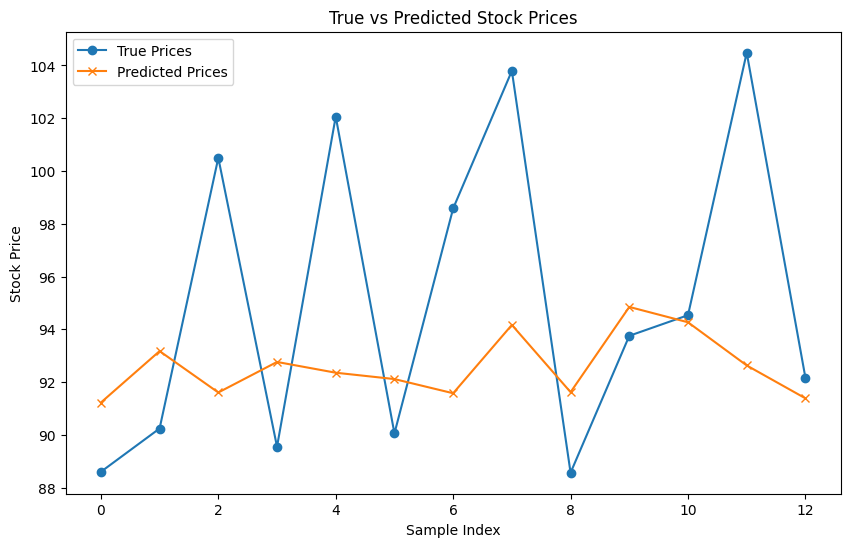

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='True Prices', marker='o')
plt.plot(y_pred, label='Predicted Prices', marker='x')
plt.legend()
plt.title("True vs Predicted Stock Prices")
plt.xlabel("Sample Index")
plt.ylabel("Stock Price")
plt.show()